In [1]:
%pip install boto3
%pip install pandas
%pip install matplotlib
%pip install io

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement io (from versions: none)
ERROR: No matching distribution found for io
Note: you may need to restart the kernel to use updated packages.


In [2]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import io

In [3]:
# Nome do bucket e arquivo
BUCKET_NAME = 'bucket-trusted-upa-connect'  # seu bucket
CSV_FILE_KEY = 'temperatura_paciente_tratado.csv/part-00000-d07413bc-c0b6-4720-9575-13b53d3a0519-c000.csv'  # exemplo: 'pasta/arquivo.csv'

# Cria o cliente S3 usando a Role da EC2
s3 = boto3.client('s3')

# Faz o download do objeto CSV
obj = s3.get_object(Bucket=BUCKET_NAME, Key=CSV_FILE_KEY)

# Lê o CSV diretamente da memória
df = pd.read_csv(io.BytesIO(obj['Body'].read()))

/usr/local/lib/python3.7/site-packages/boto3/compat.py:82: PythonDeprecationWarning: Boto3 will no longer support Python 3.7 starting December 13, 2023. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.8 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


In [4]:
# Exibe o DataFrame (opcional)
display(df.head())

,fk_paciente,data_hora,media_temperatura
0,1,2025-01-10 08:30:00,37.7
1,2,2025-01-15 09:00:00,37.7
2,3,2025-01-20 10:30:00,37.2
3,4,2025-01-25 11:00:00,36.8
4,5,2025-01-30 12:00:00,37.0


In [5]:
# Agora vamos transformar o campo 'data_hora' em datetime
df['data_hora'] = pd.to_datetime(df['data_hora'])

# Criar uma nova coluna 'mes' para agrupar
df['mes'] = df['data_hora'].dt.month

# Agrupar por mês e calcular a média da temperatura
df_media_mensal = df.groupby('mes')['media_temperatura'].mean().reset_index()

# Nomear os meses
nomes_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 
               'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
df_media_mensal['mes_nomeado'] = df_media_mensal['mes'].apply(lambda x: nomes_meses[x-1])

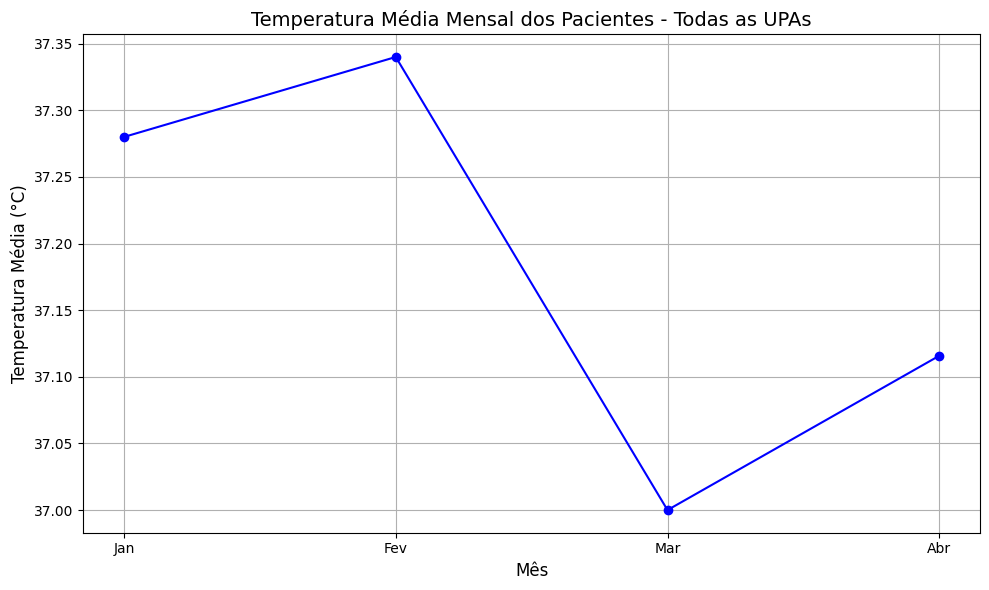

In [6]:
# Plotar o gráfico
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
ax.plot(df_media_mensal['mes_nomeado'], df_media_mensal['media_temperatura'], marker='o', linestyle='-', color='blue')

ax.set_xlabel('Mês', fontsize=12)
ax.set_ylabel('Temperatura Média (°C)', fontsize=12)
ax.set_title('Temperatura Média Mensal dos Pacientes - Todas as UPAs', fontsize=14)
ax.grid(True)
plt.tight_layout()
plt.show()